In [1]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras 

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

In [3]:
pre_clf = Perceptron()
pre_clf.fit(X, y)


Perceptron()

In [4]:
y_pred = pre_clf.predict([[2, 0.5]])

In [5]:
tf.__version__

'2.5.0'

In [6]:
keras.__version__

'2.5.0'

In [7]:
# Building an Image Classifier Using the Sequential API

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
# Creating the model using the Sequential API
# Here is a classification MLP with two hidden layers 

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the Sequantial model
list_model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation='relu'),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(10, activation='softmax')

])

In [12]:
"""
Using coding examples from keras.io
Code examples documented on keras.io will work fine with tf.keras, but you need to change the imports. For example, consider this keras
"""

from keras.layers import Dense
output_layer = Dense(10)

# You must change imports like this

from tensorflow.keras.layers import Dense

# Or use full paths if you prefer 
from tensorflow import keras
output_layer = keras.layers.Dense(10)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
weights, biases = hidden1.get_weights()

In [17]:
weights
weights.shape

(784, 300)

In [18]:
biases
biases.shape

(300,)

In [19]:
# Compiling the model
"""
After a model if created, you must call its compile() method to specify the loss function and the optimizer to use.
Optionally, you cxan specify a list of extra metrics to compute during training and evaluation:
"""

model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd',
             metrics=['accuracy'])

In [20]:
# Training and evaluating the model
# Now, the model is ready to be trained. Simply call its fit() methods

history = model.fit(X_train, y_train, epochs=40,
                   validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 2s 877us/step - loss: 0.7217 - accuracy: 0.7658 - val_loss: 0.5276 - val_accuracy: 0.8198
Epoch 2/40
1719/1719 [==============================] - 1s 812us/step - loss: 0.4880 - accuracy: 0.8298 - val_loss: 0.4854 - val_accuracy: 0.8332
Epoch 3/40
1719/1719 [==============================] - 1s 825us/step - loss: 0.4425 - accuracy: 0.8450 - val_loss: 0.4294 - val_accuracy: 0.8554
Epoch 4/40
1719/1719 [==============================] - 1s 806us/step - loss: 0.4159 - accuracy: 0.8536 - val_loss: 0.4066 - val_accuracy: 0.8602
Epoch 5/40
1719/1719 [==============================] - 1s 807us/step - loss: 0.3933 - accuracy: 0.8609 - val_loss: 0.3887 - val_accuracy: 0.8656
Epoch 6/40
1719/1719 [==============================] - 1s 810us/step - loss: 0.3767 - accuracy: 0.8668 - val_loss: 0.3678 - val_accuracy: 0.8708
Epoch 7/40
1719/1719 [==============================] - 1s 832us/step - loss: 0.3632 - accuracy: 0.8709 - val_loss: 0.3726 -

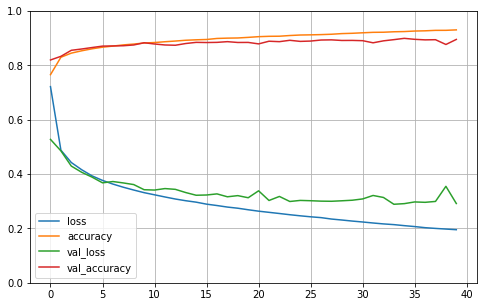

In [21]:
"""
The Fit() methods returns a History object containing the training parameters(history.params),
The list of epochs it went through (history.epoch),
A Dictioanry (history.history) containing the loss
extra metrics it measured at the end of each epoch on the training set and on the validation set
Create a PD DF call its plot() method, you get the learning curves
"""

import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 828us/step - loss: 73.2465 - accuracy: 0.8382


[73.24645233154297, 0.8381999731063843]

In [23]:
# Using the model to make predictions
"""
Next, we can use the model's predict() method to make predictions on new instances. 
Since we dont have new instances we take from test set
"""
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [59]:
"""
Building a Regression MLP Using Sequantial API using California housing data.

After loading the data, we split it into a training set, a validation set, and a test set.
"""

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [60]:
housing = fetch_california_housing()

In [61]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [63]:
"""
With regression MLP the output layer has a single neuron (since we only want to predict a single value)
Uses no activation funtion, and the loss function is the mean squared error. 
"""

model = keras.models.Sequential([
    keras.layers.Dense(30, activation ='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 704us/step - loss: 0.9779 - val_loss: 0.6865
Epoch 2/20
363/363 [==============================] - 0s 506us/step - loss: 1.5942 - val_loss: 0.5133
Epoch 3/20
363/363 [==============================] - 0s 503us/step - loss: 0.5133 - val_loss: 0.4389
Epoch 4/20
363/363 [==============================] - 0s 501us/step - loss: 0.4669 - val_loss: 0.4190
Epoch 5/20
363/363 [==============================] - 0s 523us/step - loss: 0.4488 - val_loss: 0.3986
Epoch 6/20
363/363 [==============================] - 0s 523us/step - loss: 0.4448 - val_loss: 0.4037
Epoch 7/20
363/363 [==============================] - 0s 501us/step - loss: 0.4235 - val_loss: 0.3853
Epoch 8/20
363/363 [==============================] - 0s 523us/step - loss: 0.4167 - val_loss: 0.3762
Epoch 9/20
363/363 [==============================] - 0s 501us/step - loss: 0.4732 - val_loss: 0.3783
Epoch 10/20
363/363 [==============================] - 0s 499us/step - loss: 0.419

In [ ]:
# Building Comples Models Using the Functional API

In [67]:
"""
One example of a nonsequental neural network is a Wide & Deep neural network.
It connects all or part of the imputs directly to the output layer.
This architecture makes it possible for the neural network to learn both deep patterns (using the deep path)
And simple rules (through the short path)
Regular MLP forces all the data to flow throught the full stack of layers.
Simple patters in the data may end up being distorted by the sequence of transformaations.
"""

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [74]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])